In [1]:
"""
Construct a binary vector. By default 10000 elements long.
"""
bithdv(N::Int=10000) = bitrand(N)


"""
Bundles binary hyperdimensional vectors based on the element-wise majority rule.
"""
function bitadd(vectors::BitVector ...)
    v = reduce(.+, vectors)
    n = length(vectors) / 2
    x = [i > n ? 1 : i < n ? 0 : rand(0:1) for i in v]
    return convert(BitVector, x)
end


"""
Binds binary hyperdimensional vectors based on an element-wise XOR gate.
"""
bitbind(vectors::BitVector ...) =  reduce(.⊻, vectors)


"""
Permutes a hyperdimensional vector by an adjustable circular shift.
"""
bitperm(vector::BitVector, k::Int=1) = circshift(vector, k)


"""
Calculates the Hamming distance between two binary vectors.
"""
hamming(x::BitVector, y::BitVector) = sum(x .!= y)/length(x)

hamming

In [2]:
AA_list = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
groups = Dict("polar" => ['S', 'T', 'Y', 'N', 'Q'], "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F'], 
         "pos+" => ['L', 'R', 'H'], "neg-" => ['D', 'E'])

Dict{String, Vector{Char}} with 4 entries:
  "non-polar" => ['G', 'A', 'V', 'C', 'P', 'L', 'I', 'M', 'W', 'F']
  "polar"     => ['S', 'T', 'Y', 'N', 'Q']
  "pos+"      => ['L', 'R', 'H']
  "neg-"      => ['D', 'E']

In [41]:
function scaler(row, lower, upper)
    minx = minimum(row)
    maxx = maximum(row)
    x = [lower + ((i - minx)*(upper-lower))/(maxx - minx) for i in row]
    return x
end

function mat_scaler(matrix, lower, upper, dim = 1)
    if dim == 2
        scaled = reduce(hcat, [scaler(matrix[:, i], lower, upper) for i in 1:size(matrix, 2)])
    elseif dim == 1
        scaled = permutedims(hcat([scaler(matrix[i, :], lower, upper) for i in 1:size(matrix, 1)]...))
    end
    return scaled
end

mat_scaler (generic function with 2 methods)

In [32]:
h = hcat([[j, j, j] for j in 1:4])

4×1 Matrix{Vector{Int64}}:
 [1, 1, 1]
 [2, 2, 2]
 [3, 3, 3]
 [4, 4, 4]

In [42]:
g = [1 2 3; 3 2 1]

2×3 Matrix{Int64}:
 1  2  3
 3  2  1

In [43]:
mat_scaler(g, 0, 1, 1)

2×3 Matrix{Float64}:
 0.0  0.5  1.0
 1.0  0.5  0.0

In [4]:
using PyCall
using TableTransforms
py"""
import pickle
infile = open("C:\\Users\\mfatj\\Desktop\\Master-Thesis\data\\aa_embeddings",'rb')
embeddings = pickle.load(infile)
infile.close()
"""
embeddings = Float64.(PyArray(py"embeddings"o))

20×1024 Matrix{Float64}:
 0.0305235  0.0244325  0.136253  …  -0.0868152  -0.114529  -0.0130492
 0.0305987  0.024212   0.136495     -0.0868855  -0.114455  -0.0128388
 0.0305679  0.0243903  0.13627      -0.0868088  -0.11453   -0.0130362
 0.0305571  0.0243289  0.136347     -0.0868393  -0.114487  -0.0129712
 0.030559   0.0243065  0.136387     -0.0868539  -0.114478  -0.0129377
 0.0305392  0.0244419  0.136237  …  -0.0868037  -0.114544  -0.0130629
 0.0305431  0.0244014  0.136274     -0.0868197  -0.114518  -0.0130352
 0.0305694  0.0243499  0.13631      -0.0868239  -0.114503  -0.0130061
 0.0305726  0.0243501  0.136314     -0.0868302  -0.114494  -0.013009
 0.0306687  0.0242043  0.136597     -0.086937   -0.114203  -0.0128511
 0.0305929  0.0243092  0.136358  …  -0.0868459  -0.114459  -0.0129814
 0.0305372  0.0244299  0.136249     -0.0868123  -0.114534  -0.0130554
 0.0305843  0.0243075  0.13634      -0.0868294  -0.114505  -0.012975
 0.0305532  0.0243951  0.136281     -0.086833   -0.1145    -0.01304

Expand an amino acid embedding into hyperdiminsionality by randomness, but consistently for every AA so that the embedding data does not get 'lost'

In [147]:
function embedding2HDV(matrix, HDVdim, parameter=3)
    AAs, ndims = size(matrix)[1], size(matrix)[2]

    v = zeros(AAs, HDVdim)
    for i in 1:HDVdim
        random_n = rand(1:ndims, parameter)
        for j in 1:AAs
            v[j, i] += sum([embeddings[j, y] for y in random_n])
        end
    end
    return v
end

embedding_hdv_bit = round.(mat_scaler(embedding2HDV(embeddings,10000), 0, 1, 2))


20×10000 Matrix{Float64}:
 0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  …  1.0  1.0  1.0  0.0  0.0  1.0  1.0
 1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0     1.0  1.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0     0.0  0.0  1.0  1.0  0.0  1.0  1.0
 0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  …  1.0  1.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0     1.0  1.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0     1.0  1.0  1.0  0.0  0.0  1.0  1.0
 1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0     1.0  0.0  0.0  0.0  1.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  …  1.0  1.0  1.0  0.0  0.0  1.0  1.0
 0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0     1.0  1.0  1.0  0.0  0.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.

In [148]:
using DataFrames, CSV
data = CSV.read("C:\\Users\\mfatj\\Desktop\\Master-Thesis\\data\\ProtExdata\\ACPs_Breast_cancer.csv", DataFrame)

class_num = [i == "very active" ? 1 : i == "mod. active" ? 2 : i == "inactive - exp" ? 3 : 4 for i in data.class]
data[!, :class_num] = class_num

947-element Vector{Int64}:
 2
 2
 2
 2
 2
 2
 2
 3
 2
 3
 ⋮
 4
 4
 4
 4
 4
 4
 4
 4
 4

In [149]:
hdvs_bit = BitVector[embedding_hdv_bit[i, :] for i in 1:20]
AA_dict_bit = Dict(zip(AA_list, hdvs_bit))

trimer_hdvs = Dict(aa1 * aa2 * aa3 => 
bitbind(AA_dict_bit[aa1], bitperm(AA_dict_bit[aa2]), bitperm(AA_dict_bit[aa3], 2))
for aa1 in AA_list for aa2 in AA_list for aa3 in AA_list)

Dict{String, BitVector} with 8000 entries:
  "DRR" => [0, 1, 1, 0, 1, 0, 0, 1, 1, 0  …  1, 1, 0, 0, 1, 1, 1, 1, 1, 0]
  "HTY" => [1, 1, 1, 1, 0, 1, 0, 0, 0, 0  …  1, 0, 1, 0, 1, 0, 1, 1, 0, 0]
  "QAM" => [0, 1, 0, 1, 1, 0, 0, 1, 1, 0  …  1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
  "WMA" => [0, 0, 0, 1, 1, 0, 0, 1, 1, 0  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
  "PPV" => [0, 1, 1, 1, 1, 1, 0, 1, 1, 1  …  1, 0, 0, 1, 1, 0, 0, 1, 1, 1]
  "WNG" => [0, 0, 0, 0, 1, 0, 0, 1, 1, 0  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
  "MSW" => [0, 1, 0, 1, 1, 1, 1, 1, 1, 0  …  1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
  "TKL" => [0, 0, 1, 1, 0, 1, 1, 0, 1, 1  …  0, 0, 1, 1, 0, 1, 1, 0, 1, 1]
  "ETI" => [0, 1, 0, 1, 1, 0, 1, 1, 1, 0  …  1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
  "KLF" => [1, 0, 1, 0, 1, 0, 1, 0, 1, 1  …  0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
  "AGI" => [0, 1, 1, 1, 1, 0, 0, 1, 1, 0  …  1, 1, 0, 0, 0, 0, 1, 1, 1, 0]
  "NMD" => [0, 1, 1, 0, 0, 0, 0, 1, 1, 0  …  1, 1, 0, 0, 0, 1, 0, 1, 1, 0]
  "YMQ" => [0, 0, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 1, 

In [150]:
function embedder(sequence)
    l = [trimer_hdvs[sequence[i:i+2]] for i in 1:length(sequence)-2]
    v = bitadd(hcat(l)...)
    return v
end

l = BitVector[]
for i in data.sequence
    push!(l, embedder(i))
end
data[!, :hdv] = l

947-element Vector{BitVector}:
 [0, 1, 0, 0, 1, 1, 0, 1, 1, 0  …  1, 1, 0, 1, 1, 0, 0, 1, 1, 0]
 [0, 1, 1, 0, 1, 0, 0, 1, 1, 0  …  1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
 [0, 1, 0, 0, 0, 0, 0, 1, 1, 0  …  1, 1, 0, 1, 1, 1, 0, 1, 1, 0]
 [0, 1, 1, 0, 0, 1, 1, 0, 1, 0  …  1, 1, 0, 0, 1, 1, 1, 0, 1, 0]
 [0, 1, 1, 0, 0, 0, 1, 0, 1, 0  …  0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
 [0, 1, 1, 0, 0, 1, 1, 0, 1, 0  …  1, 1, 0, 0, 0, 1, 1, 0, 1, 0]
 [0, 0, 1, 0, 0, 1, 1, 0, 1, 1  …  0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
 [0, 0, 1, 0, 0, 1, 1, 0, 1, 1  …  0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
 [0, 0, 1, 0, 0, 1, 0, 1, 0, 1  …  1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
 [0, 1, 0, 0, 1, 0, 0, 1, 1, 0  …  1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
 ⋮
 [0, 0, 1, 0, 1, 1, 0, 1, 0, 1  …  1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
 [0, 0, 0, 1, 1, 1, 0, 0, 0, 1  …  1, 0, 0, 1, 0, 0, 0, 0, 0, 1]
 [0, 0, 1, 1, 0, 1, 1, 0, 1, 1  …  0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
 [0, 1, 1, 1, 0, 0, 0, 1, 1, 0  …  1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
 [1, 0, 1, 1, 0, 1, 0, 1, 0, 1  …  0, 0, 0, 0, 0, 0, 0, 

In [151]:
active_hdv = bitadd(hcat([i for i in data[data.class_num .== 1, :hdv]])...)
modactive_hdv = bitadd(hcat([i for i in data[data.class_num .== 2, :hdv]])...)
notactive_exp_hdv = bitadd(hcat([i for i in data[data.class_num .== 3, :hdv]])...)
notactive_virt_hdv = bitadd(hcat([i for i in data[data.class_num .== 4, :hdv]])...)

10000-element BitVector:
 0
 1
 1
 0
 0
 0
 0
 1
 1
 0
 ⋮
 1
 0
 0
 1
 0
 1
 1
 1
 0

In [152]:
using MultivariateStats

matrix_all = permutedims(hcat(data.hdv...))

S = fit(MultivariateStats.PCA, matrix_all; maxoutdim=2)
projS = projection(S)
S

PCA(indim = 947, outdim = 2, principalratio = 0.4269468039774435)

Pattern matrix (unstandardized loadings):
───────────────────────────────
              PC1           PC2
───────────────────────────────
1     0.382462      0.0941941
2     0.413633      0.139121
3     0.402313      0.107632
4     0.274405     -0.0705656
5     0.275312     -0.0712344
6     0.273941     -0.0726252
7    -0.353416      0.114297
8    -0.357886      0.0994984
9    -0.169715      0.140768
10    0.429762      0.119702
11   -0.331431      0.192205
12    0.307687     -0.0280788
13   -0.252047      0.316218
14   -0.292146      0.241057
15   -0.333598      0.174228
16   -0.353601      0.111362
17   -0.361086      0.132861
18   -0.267804      0.284591
19   -0.364704      0.119448
20   -0.35313       0.141511
21   -0.342808      0.16494
22   -0.368066      0.125406
23   -0.352046      0.137582
24   -0.0454494     0.115891
25   -0.302951      0.236283
26   -0.330895      0.175457
27   -0.363658      0.113
28   -0.34

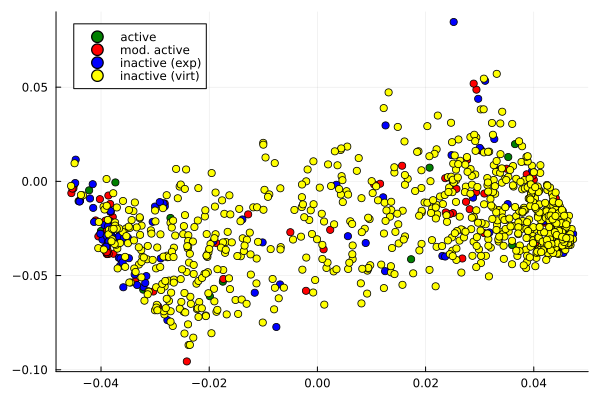

In [153]:
indices = [[i for i in 1:nrow(data) if data.class_num[i] == j] for j in 1:4]

using Plots

function plotter()
    colors = [:green, :red, :blue, :yellow]
    labels = ["active", "mod. active", "inactive (exp)", "inactive (virt)"]
    fig = Plots.plot()

    for i in 1:4
        scatter!(fig, (projS[indices[i], 1], projS[indices[i], 2]), label=labels[i], mc = colors[i])
    end
    return fig
end

plotter()

In [154]:
function predict(seq)
    y = [hamming(active_hdv, seq), hamming(modactive_hdv, seq), hamming(notactive_exp_hdv, seq), hamming(notactive_virt_hdv, seq)]
    return findmin(y)[2]
end

predict (generic function with 1 method)

In [155]:
using MLDataPattern
using Statistics
v = []
for i in 1:100
    (X_train,y_train), (X_test,y_test) = stratifiedobs((data.hdv, data.class_num), p = 0.8)
    
    active_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 1])...)
    modactive_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 2])...)
    notactive_exp_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 3])...)
    notactive_virt_hdv_t = bitadd(hcat([X_train[i] for i in 1:length(y_train) if y_train[i] == 4])...)

    pred = [predict(i) for i in X_test]
    push!(v, Statistics.mean(y_test .== pred))
end

Statistics.mean(v)


0.564315789473684

In [156]:
sorted_list = [i for (k,v) in groups for i in v]

function AA_dist_calc(x, cos=true)
    df = DataFrame([[] for i in 1:20], string.(sorted_list), makeunique=true)
    for i in sorted_list
        r = []
        for j in sorted_list
            if cos == true
                push!(r, cosine(x[i], x[j]))
            else
                push!(r, hamming(x[i], x[j]))
            end
        end
        push!(df, r)
    end
    insertcols!(df, 1, :coef => sorted_list)
    return df
end

AA_dist_calc (generic function with 2 methods)

In [157]:
df_bin = AA_dist_calc(AA_dict_bit, false)

Row,coef,G,A,V,C,P,L,I,M,W,F,S,T,Y,N,Q,L_1,R,H,D,E
,Char,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,G,0.0,0.0183,0.8527,0.6149,0.2935,0.815,0.0781,0.0992,0.253,0.379,0.0369,0.0516,0.461,0.0108,0.0449,0.815,0.1029,0.0148,0.0365,0.2197
2,A,0.0183,0.0,0.8576,0.6052,0.2972,0.8177,0.0858,0.1073,0.2603,0.3681,0.0428,0.0561,0.4497,0.0179,0.0528,0.8177,0.108,0.0179,0.0498,0.2158
3,V,0.8527,0.8576,0.0,0.5056,0.7876,0.0499,0.8742,0.8059,0.7651,0.7355,0.824,0.8149,0.6521,0.8477,0.8196,0.0499,0.8806,0.8545,0.8684,0.8472
4,C,0.6149,0.6052,0.5056,0.0,0.3814,0.5419,0.5854,0.6329,0.4563,0.2449,0.642,0.6529,0.1595,0.6199,0.6518,0.5419,0.5556,0.6165,0.6144,0.418
5,P,0.2935,0.2972,0.7876,0.3814,0.0,0.8053,0.2238,0.2863,0.1067,0.1751,0.3252,0.3293,0.2629,0.2997,0.3234,0.8053,0.1932,0.2921,0.2634,0.1046
6,L,0.815,0.8177,0.0499,0.5419,0.8053,0.0,0.8429,0.7698,0.7626,0.7648,0.7837,0.773,0.6868,0.8088,0.7789,0.0,0.8559,0.814,0.8323,0.8515
7,I,0.0781,0.0858,0.8742,0.5854,0.2238,0.8429,0.0,0.0843,0.1753,0.3527,0.1036,0.1061,0.4467,0.0809,0.0998,0.8429,0.0326,0.0741,0.0452,0.176
8,M,0.0992,0.1073,0.8059,0.6329,0.2863,0.7698,0.0843,0.0,0.2086,0.4124,0.0861,0.0752,0.4996,0.0924,0.0735,0.7698,0.1129,0.0902,0.0869,0.2441
9,W,0.253,0.2603,0.7651,0.4563,0.1067,0.7626,0.1753,0.2086,0.0,0.2638,0.2745,0.2712,0.3494,0.2554,0.2667,0.7626,0.1563,0.2484,0.2175,0.1525
